# Scenario 6: Regnets for gene expression and regulation

A fundamental theory in molecular biology, known as the ‘the central dogma’, describes gene expression as the flow of information from DNA to RNA (through a step called transcription), and from RNA to proteins (through a step called translation). The processes of transcription, translation, and protein degradation, depend on the amount of RNA (specifically, mRNA), and proteins, and mathematically can be described as the rate of change of the concentrations of these materials. This scenario will explore several simple models of gene expression and regulation.

### Load Dependencies

In [1]:
import os
import pyciemss
import torch

from pyciemss.compiled_dynamics import CompiledDynamics

import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

### Select models

In [2]:
MODEL_PATH = "https://raw.githubusercontent.com/gyorilab/mira/main/notebooks/hackathon_2024.02/scenario6/"

chen_petri = os.path.join(MODEL_PATH, "scenario6_chen_petrinet.json")
hunt_petri = os.path.join(MODEL_PATH, "scenario6_hunt_petrinet.json")
chen_regnet = os.path.join(MODEL_PATH, "scenario6_chen_regnet.json")
hunt_regnet = os.path.join(MODEL_PATH, "scenario6_hunt_regnet.json")

### Set parameters for sampling

In [3]:
start_time = 0.0
end_time = 100.0
logging_step_size = 10.0
num_samples = 1 # these models do not include uncertainty, so only one sample is needed

## Sample Chen model (petrinet version)

,timepoint_id,sample_id,timepoint_unknown,p_1_state,p_2_state,p_3_state,r_1_state,r_2_state,r_3_state
0,0,0,10.0,254.768524,369.904999,319.106354,39.356445,41.578896,33.411282
1,1,0,20.0,1281.609863,1326.477417,1804.085449,200.039337,201.686325,161.458862
2,2,0,30.0,6488.167969,6512.385742,9165.983398,1012.771667,1013.991028,811.274475
3,3,0,40.0,32847.785156,32863.710938,46334.222656,5127.381348,5128.284668,4102.688477
4,4,0,50.0,166299.187500,166310.468750,234443.515625,25958.494141,25959.171875,20767.398438


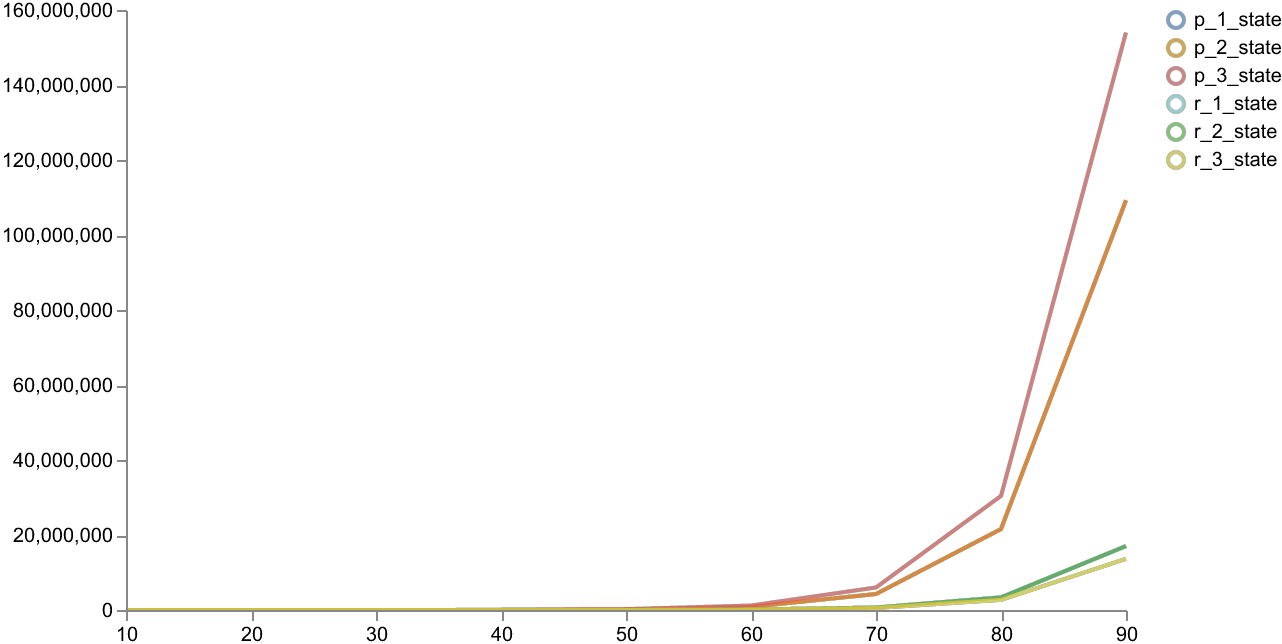

In [4]:
result1 = pyciemss.sample(chen_petri, end_time, logging_step_size, num_samples, start_time=start_time)
display(result1['data'].head())

# Plot results for all states
schema = plots.trajectories(result1["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Sample Hunt model (petrinet version)

,timepoint_id,sample_id,timepoint_unknown,p_1_state,p_2_state,p_3_state,r_1_state,r_2_state,r_3_state
0,0,0,10.0,74.282356,154.584518,169.472260,11.009945,12.841146,16.492516
1,1,0,20.0,104.376816,139.858856,327.970764,17.312672,23.690058,21.837887
2,2,0,30.0,128.605331,184.168564,460.359039,22.087620,35.875282,26.465206
3,3,0,40.0,146.185043,226.610504,573.593689,26.017061,47.541309,30.638985
4,4,0,50.0,159.858215,262.117310,671.533142,29.392014,58.481174,34.385143


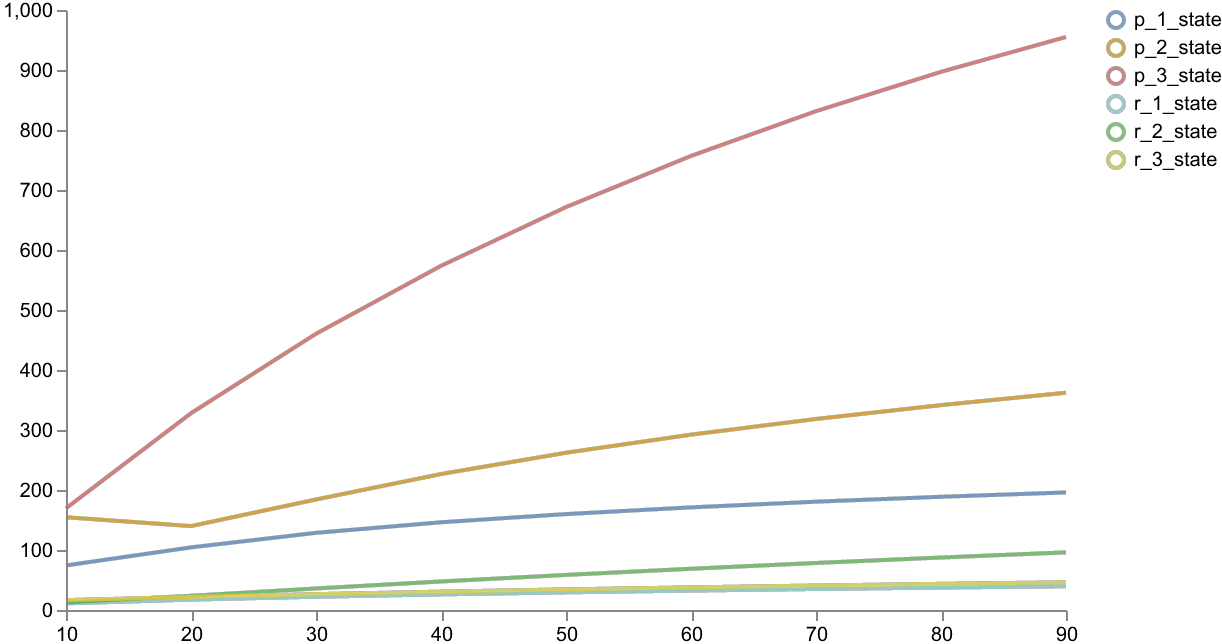

In [5]:
result1 = pyciemss.sample(hunt_petri, end_time, logging_step_size, num_samples, start_time=start_time)
display(result1['data'].head())

# Plot results for all states
schema = plots.trajectories(result1["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Regnet model versions fail
The regnet version of the Chen and Hunt models do not appear to represent the same system as the petrinet versions

### Chen model dynamics

In [6]:
# Print Chen petrinet dynamics
chen_petri_model = CompiledDynamics.load(chen_petri)
display(chen_petri_model)

CompiledDynamics(
  (numeric_deriv_func): SymPyModule(expressions=(C_0*p_1 - V_0*r_1, C_1*p_1 - V_1*r_2, C_2*p_1 - V_2*r_3, L_0*r_1 - U_0*p_1, L_1*r_2 - U_1*p_2, L_2*r_3 - U_2*p_3))
  (numeric_initial_state_func): SymPyModule(expressions=(3.00000000000000, 6.00000000000000, 5.00000000000000, 100.000000000000, 500.000000000000, 1.00000000000000))
)

In [7]:
# Print Chen regnet dynamics
chen_regnet_model = CompiledDynamics.load(chen_regnet)
display(chen_regnet_model)

CompiledDynamics(
  (numeric_deriv_func): SymPyModule(expressions=(r_1*(C_0*p_1 + V_0), r_2*(C_1*p_1 + V_1), r_3*(C_2*p_1 + V_2), p_1*(L_0*r_1 + U_0), p_2*(L_1*r_2 + U_1), p_3*(L_2*r_3 + U_2)))
  (numeric_initial_state_func): SymPyModule(expressions=(3.00000000000000, 6.00000000000000, 5.00000000000000, 100.000000000000, 500.000000000000, 1.00000000000000))
)

### Hunt model dynamics

In [8]:
# Print Hunt petrinet dynamics
hunt_petri_model = CompiledDynamics.load(hunt_petri)
display(hunt_petri_model)

CompiledDynamics(
  (numeric_deriv_func): SymPyModule(expressions=((L_0*d_0*r_1 - U_0*p_1*(d_0 + p_1))/(d_0 + p_1), (C_0*a_0**2*p_1*(b_0 + p_2) - V_0*b_0*r_1*(a_0**2 + p_1**2))/((a_0**2 + p_1**2)*(b_0 + p_2)), (L_1*d_1*r_2 - U_1*p_2*(d_1 + p_2))/(d_1 + p_2), (C_1*a_1*p_1*(b_1 + p_2) - V_1*b_1*r_2*(a_1 + p_2))/((a_1 + p_2)*(b_1 + p_2)), (L_2*d_2*r_3 - U_2*p_3*(d_2 + p_3))/(d_2 + p_3), (C_2*a_2*p_1*(b_2 + p_2) - V_2*b_2*r_3*(a_2 + p_3))/((a_2 + p_3)*(b_2 + p_2))))
  (numeric_initial_state_func): SymPyModule(expressions=(100.000000000000, 3.00000000000000, 500.000000000000, 6.00000000000000, 1.00000000000000, 5.00000000000000))
)

In [9]:
# Print Hunt regnet dynamics
hunt_regnet_model = CompiledDynamics.load(hunt_regnet)
display(hunt_regnet_model)

CompiledDynamics(
  (numeric_deriv_func): SymPyModule(expressions=(p_1*(L_0*r_1 + U_0), p_2*(U_1 + d_1*r_2), p_3*(L_2*r_3 + U_2), r_1*(C_0*p_1 - b_0*p_2), p_2*r_2*(C_1 - b_1), r_3*(-V_2*p_2 + a_2*p_3)))
  (numeric_initial_state_func): SymPyModule(expressions=(100.000000000000, 500.000000000000, 1.00000000000000, 3.00000000000000, 6.00000000000000, 5.00000000000000))
)

### Note that, unlike the petrinet, the `expressions` in the regnet are not equivalent to the given system 

## Sample Chen model (regnet version)

In [10]:
result1 = pyciemss.sample(chen_regnet, end_time, logging_step_size, num_samples, start_time=start_time)
display(result1['data'].head())

# Plot results for all states
schema = plots.trajectories(result1["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

ERROR:root:
                ###############################

                There was an exception in pyciemss

                Error occured in function: sample

                Function docs : 
    Load a model from a file, compile it into a probabilistic program, and sample from it.

    Args:
        model_path_or_json: Union[str, Dict]
            - A path to a AMR model file or JSON containing a model in AMR form.
        end_time: float
            - The end time of the sampled simulation.
        logging_step_size: float
            - The step size to use for logging the trajectory.
        num_samples: int
            - The number of samples to draw from the model.
        solver_method: str
            - The method to use for solving the ODE. See torchdiffeq's `odeint` method for more details.
            - If performance is incredibly slow, we suggest using `euler` to debug.
              If using `euler` results in faster simulation, the issue is likely that the model is s

AssertionError: non-finite values in state `y`: tensor([5.1638e+13,        inf, 1.0411e+04, 7.7457e+11, 1.5491e+12, 6.7471e+09])

## Sample Hunt model (regnet version)

In [ ]:
result1 = pyciemss.sample(hunt_regnet, end_time, logging_step_size, num_samples, start_time=start_time)
display(result1['data'].head())

# Plot results for all states
schema = plots.trajectories(result1["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)